## Telco Classification Project

## Project Goals:

- Find drivers for customer churn at Telco. Why are customers churning?
- Construct a ML classification model that accurately predicts customer churn.
- Present your process and findings to the lead data scientist.


## Questions we will be addressing throughout this project:
 - Q1: Does contract type affect whether someone churns?
 - Q2: Are high monthly charges causing customers to churn?
 - Q3: Is a customer having fiber optic internet related to a customer churning?
 - Q4: Is a customer having manual payments related to a customer churning?


**Data Dictionary**

| Feature | Definition | 
| :- | :- |
| Monthly Chaerge | Amount a customer is charged monthly |
| Total Charges | Cumulative amount a customer has paid |
| Gender Male | If a customer is male or female, 0 = Female, 1 = Male |
| Has Partner | If a customer has a partner, 0 = No, 1 = Yes |
| Has Dependents | If a customer has dependents, 0 = No, 1 = Yes |
| Has Phone Service | If a customer has phone service, 0 = No, 1 = Yes |
| Has Paperless Billing | If a customer has paperless billing, 0 = No, 1 = Yes |
| Has Tech Support | If a customer has tech support, 0 = No, 1 = Yes |
| Has Online Security | If a customer has online security, 0 = No, 1 = Yes |
| Has Online Backup | If a customer has online backup, 0 = No, 1 = Yes |
| Has Streaming TV | If a customer has streaming tv, 0 = No, 1 = Yes |
| Has Streaming Movies | If a customer has streaming movies, 0 = No, 1 = Yes |
| Has Device Protection | If a customer has device protection, 0 = No, 1 = Yes |
| Has Dependents | If a customer has dependents, 0 = No, 1 = Yes |
| Has Multiple Lines | If a customer has multiple lines, 0 = No, 1 = Yes |
| Contract | Type of contract customer has, 0 = Month-to-month, 1 = One year, 2 = Two year|
| Internet Service | Type of Internet Service customer has, 0 = No internet service, 1 = DSL, 2 = Fiber optic |
| Has Automatic Payment | If a customer has automatic payment, 0 = No, 1 = Yes |
| Churn (Target Variable) | If a customer has churned, False = No, True = Yes |
---


**Imports**

In [50]:
# standard data science imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# data prep imports
from sklearn.model_selection import train_test_split

# stats import
from scipy import stats

# modeling imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# model evaluation imports
from sklearn.metrics import \
accuracy_score,\
recall_score,\
precision_score,\
confusion_matrix,\
classification_report

# custom modules
import env
import acquire_telco as a
import prepare as p
import explore as e

# ignore warning import
import warnings
warnings.filterwarnings("ignore")

## Acquire

In [51]:
df = a.get_telco_data()

this file exists, reading csv


>Acquired telco data by using my get_telco_data function from my acquire.py file. This function pulls the telco_churn data from the mySQL Codeup db into a dataframe.

>username, host, and password credentials are needed to pull in the data from mySQL.

## Prepare

In [52]:
#splitting data function from my prepare file to split data into train, validate, and test
df = p.prep_telco(df)

# using my splitting data function from my prepare file 
train, validate, test = p.splitting_data(df, 'churn')

**Cleaning and Splitting steps**
- Dropped unnecessary columns
- Filled in empty values in internet_service_type with "No Internet Service"
- Verified data types were appropriate
- Encoded and created dummy variables for my categorial variables
- Split data into train, validate, test, with churn as my target variable

Looking at a portion of train data to verify cleaning and split functions did their job.

In [53]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_No Internet Service,payment_types_Manual
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,0,0,0,0,1,1,0,1,0,0
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,0,0,0,0,0,0,0,1,0,1
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,0,1,0,1,0,0,0,0,1,1
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,0,0,1,0,0,0,0,1,0,0
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,0,0,0,0,1,0,1,0,0,1


In [54]:
print(train.shape)
print(validate.shape)
print(test.shape)

(4225, 46)
(1409, 46)
(1409, 46)


## Explore

**Visualizing our target variable**
- 1121 of the 4225 customers from our training data have churned
- ~27% overall churn rate

churn
No     3104
Yes    1121
Name: count, dtype: int64
churn
No     0.734675
Yes    0.265325
Name: proportion, dtype: float64


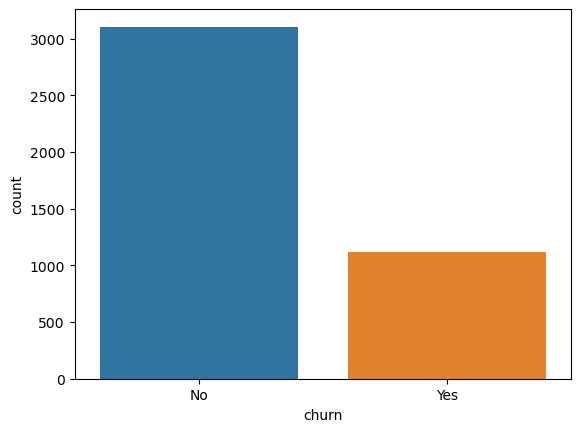

In [55]:
print(train.churn.value_counts())#printing churn value counts
print(train.churn.value_counts(normalize=True)) #printing churn value counts as a percentage
sns.countplot(data=train, x='churn'); #plotting churn value counts

**Q1: Does contract type affect whether or not someone churns?**

**Hypothesis**

$H_o$: There is NO relationship between contract and a customer churning.

$H_a$: There is a relationship between contract and a customer churning.

In [56]:
#setting confidence level
alpha=0.05

**Visualize**

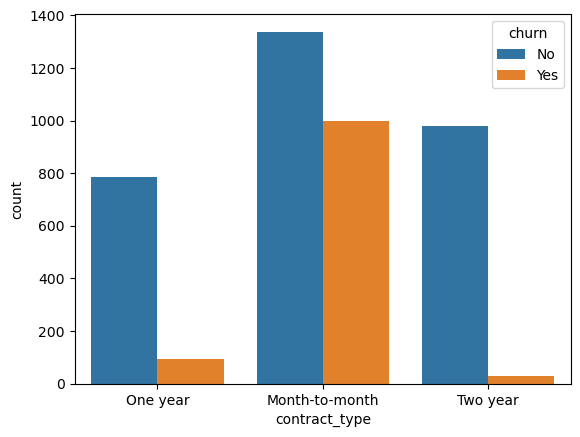

In [57]:
#countplot showing distribution of contract types comparing churn levels
sns.countplot(x="contract_type", hue="churn", data=train);

>Visually, it looks like an overwhelming majority of customers with month to month contracts are churning compared to one or two year contracts.

In [58]:
#creating a contingency table of observed values from the contract type and churn columns.
observed = pd.crosstab(train.churn, train.contract_type)

>We will use a chi2 test because we are comparing two categorial variables and want to test for independence.

In [59]:
#function from explore file that prints chi^2 results in a dataframe 
#and if we will reject or fail to reject null hypothesis
e.chi2_results(observed)

Expected DataFrame
contract_type  Month-to-month  One year  Two year
churn                                            
No                       1715       645       742
Yes                       619       233       268


Observed DataFrame
contract_type  Month-to-month  One year  Two year
churn                                            
No                       1338       785       981
Yes                       997        94        30
chi^2 = 714.1745
p     = 0.0000
---

p is less than alpha so we reject the null hypothesis


**Summarize**

We can conclude that contract type does affect whether or not someone churns and it appears to be much higher with month to month contracts compared to one or two year contracts.

**Q2: Are high monthly charges causing customers to churn?**

High monthly charges is defined as being higher than average monthly charges.

**Hypothesis**

$H_o$: Monthly charges of churned customers is less than or equal to the monthly charges of all customers.

$H_a$: Monthly charges of churned customers is higher than the monthly charges of all customers.

In [60]:
#setting confidence level
alpha = 0.05

**Visualize**

Creating some variables to use for my visuals

In [61]:
#creating variable for average monthly charges
avg_monthly_charges = train['monthly_charges'].mean()
#creating variable for high monthly charges
high_monthly_charges = train.churn[train['monthly_charges'] > avg_monthly_charges]
#creating variable for low monthly charges
low_monthly_charges = train.churn[train['monthly_charges'] < avg_monthly_charges]

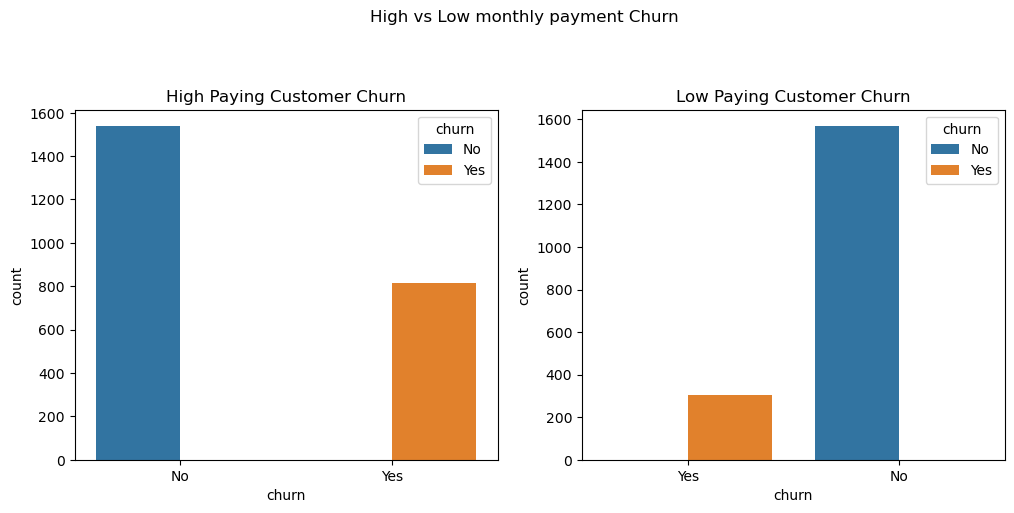

In [62]:
#Creating subplots to compare high vs low monthly payment customers who churn
plt.figure(figsize=(12, 10))
plt.suptitle('High vs Low monthly payment Churn')
#creating high paying customer plot
plt.subplot(221)
sns.countplot(x=high_monthly_charges, hue="churn", data=train);
plt.title('High Paying Customer Churn')
#creating low paying customer plot
plt.subplot(222)
sns.countplot(x=low_monthly_charges, hue="churn", data=train);
plt.title('Low Paying Customer Churn');

- nearly 35% of customers churn with higher than average monthly payments 

- only 16% of customers churn with lower than average payments

**Analyze**

Comparing categorical (churned:True or False) vs continuous variable (monthly charges) so
we will use a one sample ttest. We're asking if customers with higher monthly charges churn more than average customers, which in this case represents our population.
So we will use a one sample, one tailed ttest

Our churn sample is large enough, as is overall count, to meet the assumptions of normal distributions.

In [63]:
#setting a variable of monthly charges of customers who churned
mc_churn = train [train.churn == 'Yes'].monthly_charges

#setting a variable of the mean of monthly charges
monthly_charges_mean = train.monthly_charges.mean()

t, p = stats.ttest_1samp(mc_churn, monthly_charges_mean)

print(f't = {t}, p/2 = {p/2}, alpha = {alpha}')

t = 12.630413381380539, p/2 = 1.3802827205112413e-34, alpha = 0.05


In [64]:
if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

We reject the null hypothesis.


**Summarize**

We confirmed that there is a relationship between monthly charges and churning. It appears that a customer having higher than average monthly charges may cause a customer to churn more often than customers with lower than average monthly charges.

**Q3: Is a customer having fiber optic internet related to a customer churning?**

**Hypothesis**

$H_o$: There is NO association between a customer having fiber optic internet and them churning.
 
$H_a$: There IS an association between a customer having fiber optic internet and them churning.

In [65]:
#setting confidence level
alpha = 0.05

**Visualize**

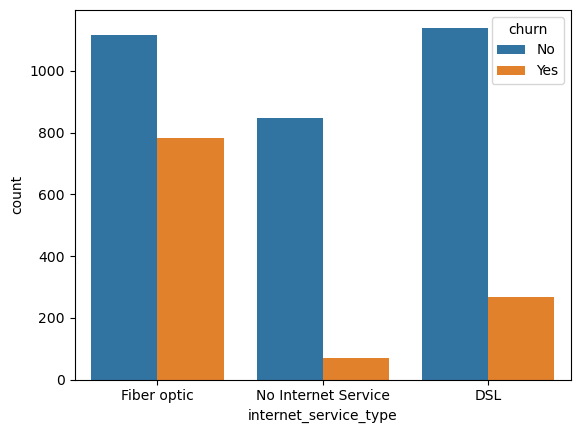

In [66]:
#plot showing distribution of internet service types which show fiber optic with a much higher churn rate than DSL.
sns.countplot(x="internet_service_type", hue="churn", data=train);

In [67]:
#41% of customers with Fiber optic internet are churning
train.churn[train['internet_service_type_Fiber optic'] == 1].value_counts(normalize=True)

churn
No     0.587987
Yes    0.412013
Name: proportion, dtype: float64

**Analyze**

We will use a chi2 test because we are comparing two categorial variables and want to test for independence.

In [68]:
#creating a contingency table of observed values from the fiber optic internet and churn columns.
observed = pd.crosstab(train.churn, train['internet_service_type_Fiber optic'])

In [69]:
#function from explore file that prints chi^2 results in a dataframe 
#and if we will reject or fail to reject null hypothesis
e.chi2_results(observed)

Expected DataFrame
internet_service_type_Fiber optic     0     1
churn                                        
No                                 1709  1394
Yes                                 617   503


Observed DataFrame
internet_service_type_Fiber optic     0     1
churn                                        
No                                 1988  1116
Yes                                 339   782
chi^2 = 379.0319
p     = 0.0000
---

p is less than alpha so we reject the null hypothesis


**Summarize**

There IS an association between a customer having fiber optic internet and them churning.

**Q4: Is a customer having manual payments related to a customer churning?**

**Hypothesis**

$H_o$: There is NO association between a payment types and the customer churning.
 
$H_a$: There IS an association between a payment types and the customer churning.

In [70]:
#setting confidence level
alpha=0.05

**Visualize**

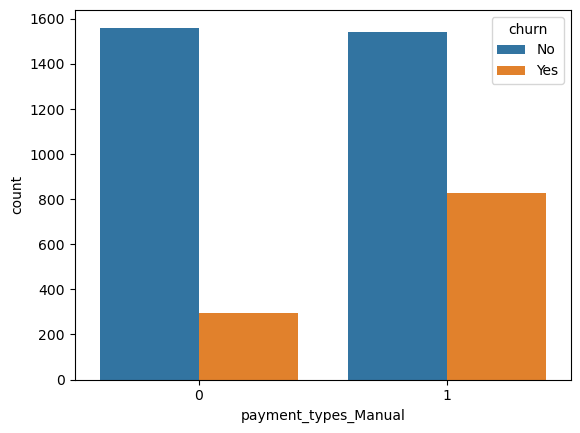

In [71]:
#plot showing distribution of payment types which show manual payments with a much higher 
#churn rate than automatic payments.
sns.countplot(x="payment_types_Manual", hue="churn", data=train);

In [72]:
#checking percentages for manual payment types comparing churned or not
train.churn[train['payment_types_Manual'] == 1].value_counts(normalize=True)

churn
No     0.65133
Yes    0.34867
Name: proportion, dtype: float64

In [73]:
#checking percentages for automatic payment types comparing churned or not
train.churn[train['payment_types_Manual'] == 0].value_counts(normalize=True)

churn
No     0.841056
Yes    0.158944
Name: proportion, dtype: float64

Around 35% or customers with manual payment type churn compred to 16% of customers with automatic payment type.

**Analyze**

We will use a chi2 test because we are comparing two categorial variables and want to test for independence.

In [74]:
#creating a contingency table of observed values from the payment types and churn columns.
observed = pd.crosstab(train.churn, train['payment_types_Manual'])

In [75]:
#function from explore file that prints chi^2 results in a dataframe 
#and if we will reject or fail to reject null hypothesis
e.chi2_results(observed)

Expected DataFrame
payment_types_Manual     0     1
churn                           
No                    1363  1740
Yes                    492   628


Observed DataFrame
payment_types_Manual     0     1
churn                           
No                    1561  1543
Yes                    295   826
chi^2 = 191.2033
p     = 0.0000
---

p is less than alpha so we reject the null hypothesis


**Summarize**

We can conclude that a customer having manual payment type is more likely to churn than a customer with automatic payments.

## Modeling

In [76]:
#creating variable of a list of variables that I will be using for modeling that will 
#help with the 4 questions asked.
for_model = ['monthly_charges', 'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic',
       'internet_service_type_No Internet Service',
       'payment_types_Manual']

In [77]:
#setting data for models for train, validate, and test
X_train = train[for_model]
X_validate = validate[for_model]
X_test = test[for_model]

In [78]:
#setting target variable for models for train, validate, and test
y_train = train.churn
y_validate = validate.churn
y_test = test.churn

>Getting my baseline

In [79]:
print(f'mode = {train.churn.mode()}')

mode = 0    No
Name: churn, dtype: object


In [80]:
(train.churn == 'No').mean()

0.7346745562130178

My baseline prediction is 'No' (not churned) which is what would happen if we predicted not churned every time and the accuracy is 73%

**Decision Tree**

In [81]:
#creating the object based on max depth that produces highest accuracy for validate.
tree = DecisionTreeClassifier(max_depth=9)
#fitting the model
tree.fit(X_train, y_train)
#making predictions
y_pred = tree.predict(X_train)
#function to estimate the probability of each outcome, using the training data
y_pred_proba = tree.predict_proba(X_train)

In [82]:
#function from explore file that takes in y_train, y_pred and prints useful information for the model.

e.model_strength(y_train, y_pred)

              precision    recall  f1-score   support

          No       0.86      0.87      0.86      3104
         Yes       0.62      0.60      0.61      1121

    accuracy                           0.80      4225
   macro avg       0.74      0.73      0.74      4225
weighted avg       0.80      0.80      0.80      4225

TP = 669
TN = 2702
FP = 402
FN = 452
 
Total = 4225
 
Accuracy = 0.7978698224852071
Precision= 0.6246498599439776
f1=0.6104014598540146
 
Support (Yes)= 1121
Support (No)= 3104
 
True Positive Rate=0.5967885816235504
False Positive Rate=0.12951030927835053
True Negative Rate=0.8704896907216495
False Negative Rate=0.4032114183764496


In [83]:
#printing accuracy of decision tree on training and validate set
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(tree.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on training set: 0.80
Accuracy of Decision Tree classifier on validate set: 0.77


In [85]:
#function to create dataframe from decision tree various max depths to visualize score changes

stats = []
for x in range(1,12):
    #create the object
    tree = DecisionTreeClassifier(max_depth=x)
    #fit the object
    tree.fit(X_train, y_train)  
    #calculate the accuracy of train and validate
    acc = tree.score(X_train, y_train)
    val_acc = tree.score(X_validate, y_validate)
    stats.append([x, round(acc,2),round(val_acc,2) ])
#creating dataframe
stats_df = pd.DataFrame(stats, columns =['max_depth','train_acc','val_acc'])

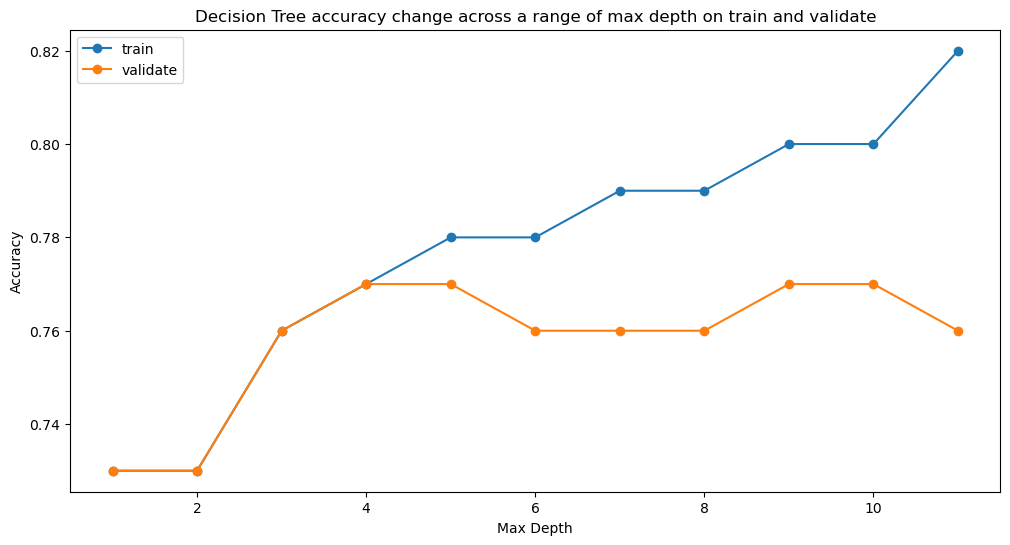

In [86]:
#plotting dataframe created above
plt.figure(figsize=(12,6))
plt.plot(stats_df.max_depth, stats_df.train_acc, label='train', marker='o')
plt.plot(stats_df.max_depth, stats_df.val_acc, label='validate', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree accuracy change across a range of max depth on train and validate')
plt.legend()
plt.show()

We can see validate reaches 0.77 whil train is at 0.8 at max depth of 9 and then validate falls after reaching 10.

This shows that my best decision tree model is the one with max depth of 9.

**Random Forest**

In [87]:
#creating the object for a random forest classifier
rf = RandomForestClassifier(min_samples_leaf=4, max_depth=7, random_state=123)
#fitting the model
rf.fit(X_train, y_train)
#making predictions
y_pred = rf.predict(X_train)

In [88]:
#function from explore file that takes in y_train, y_pred and prints useful information for the model.
e.model_strength(y_train, y_pred)

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      3104
         Yes       0.62      0.53      0.57      1121

    accuracy                           0.79      4225
   macro avg       0.73      0.70      0.71      4225
weighted avg       0.78      0.79      0.78      4225

TP = 590
TN = 2738
FP = 366
FN = 531
 
Total = 4225
 
Accuracy = 0.7876923076923077
Precision= 0.6171548117154811
f1=0.5681271064034664
 
Support (Yes)= 1121
Support (No)= 3104
 
True Positive Rate=0.5263157894736842
False Positive Rate=0.11791237113402062
True Negative Rate=0.8820876288659794
False Negative Rate=0.47368421052631576


In [89]:
#printing accuracy of random forest on training and validate set
print('Accuracy of Random Forest classifier on training set: {:.2f}'
      .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of Random Forest classifier on training set: 0.79
Accuracy of Random Forest classifier on validate set: 0.77


In [90]:
#function to create dataframe from random forest various min leafs and max depths to visualize score changes
stats = []
for x in range(1,11):
    #creating the object for a random forest classifier
    rf = RandomForestClassifier(min_samples_leaf=x, max_depth=11-x, random_state=123)
    #fitting the model
    rf.fit(X_train, y_train)
    #making predictions
    y_pred = rf.predict(X_train)

    acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_validate, y_validate)
    
    stats.append([x, 11-x,round(acc,2),round(val_acc,2) ]) 
#creating dataframe
stats_df = pd.DataFrame(stats, columns =['min_leaf','max_depth','train_acc','val_acc'])
stats_df

,min_leaf,max_depth,train_acc,val_acc
0,1,10,0.82,0.76
1,2,9,0.80,0.76
2,3,8,0.79,0.77
3,4,7,0.79,0.77
4,5,6,0.78,0.77
5,6,5,0.78,0.77
6,7,4,0.78,0.77
7,8,3,0.76,0.76
8,9,2,0.73,0.73
9,10,1,0.73,0.73


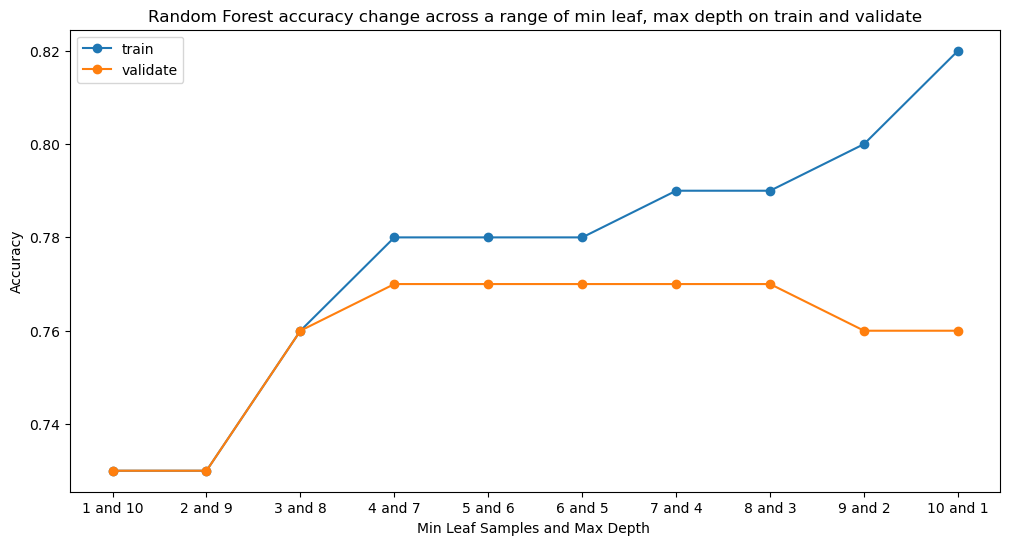

In [91]:
#plotting dataframe created above
plt.figure(figsize=(12,6))
plt.plot(stats_df.max_depth, stats_df.train_acc, label='train', marker='o')
plt.plot(stats_df.max_depth, stats_df.val_acc, label='validate', marker='o')

plt.xticks([1,2,3,4,5,6,7,8,9,10],
            [('1 and 10'),('2 and 9'),('3 and 8'),('4 and 7'),('5 and 6'),
            ('6 and 5'),('7 and 4'), ('8 and 3'), ('9 and 2'), ('10 and 1') ] #Adding labels to show min leaf/max depth
            )
plt.xlabel('Min Leaf Samples and Max Depth ')
plt.ylabel('Accuracy')
plt.title('Random Forest accuracy change across a range of min leaf, max depth on train and validate')
plt.legend()
plt.show()

Best Random Forest model is one with 4 min leaf samples and max depth of 7 with train accuracy of 0.79 and validate accuracy of 0.77.

**KNN**

In [92]:
#creating and fitting the knn model
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X_train, y_train)
#setting y_pred for knn model
y_pred = knn.predict(X_train)
#checking knn model strength stats
e.model_strength(y_train, y_pred)

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      3104
         Yes       0.63      0.52      0.57      1121

    accuracy                           0.79      4225
   macro avg       0.74      0.71      0.72      4225
weighted avg       0.78      0.79      0.79      4225

TP = 587
TN = 2763
FP = 341
FN = 534
 
Total = 4225
 
Accuracy = 0.7928994082840237
Precision= 0.6325431034482759
f1=0.5729624206930211
 
Support (Yes)= 1121
Support (No)= 3104
 
True Positive Rate=0.5236396074933095
False Positive Rate=0.10985824742268041
True Negative Rate=0.8901417525773195
False Negative Rate=0.47636039250669043


In [93]:
#printing knn model train and validate scores

print(f'knn training score = {round(knn.score(X_train, y_train),2)}')
print(f'knn validate score = {round(knn.score(X_validate, y_validate),2)}')

knn training score = 0.79
knn validate score = 0.77


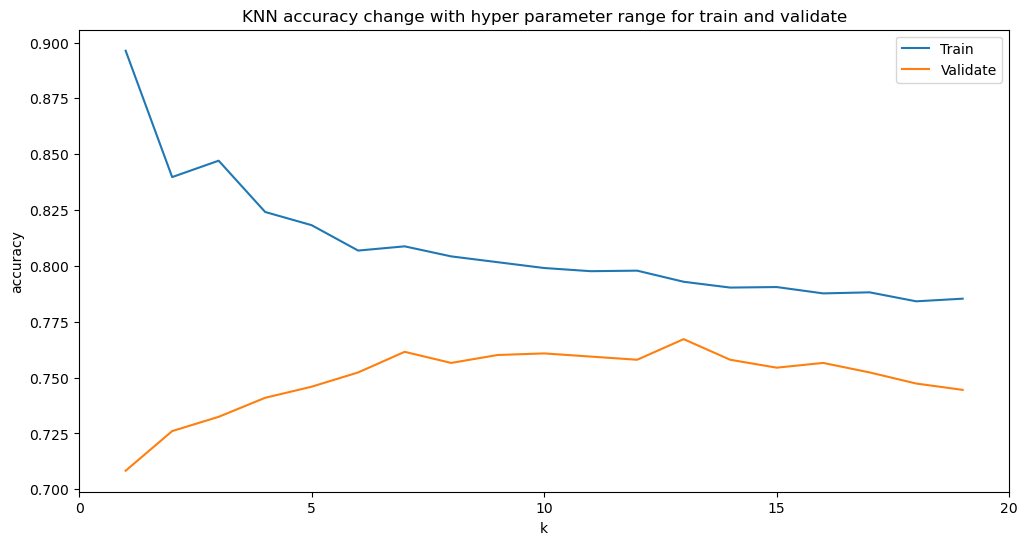

In [94]:
#plotting KNN accuracy changes for different hyper parameters for train and validate
k_range = range(1, 20)
train_scores = []
validate_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    validate_scores.append(knn.score(X_validate, y_validate))
plt.figure(figsize=(12,6))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('KNN accuracy change with hyper parameter range for train and validate')
plt.plot(k_range, train_scores, label='Train')
plt.plot(k_range, validate_scores, label='Validate')
plt.legend()
plt.xticks([0,5,10,15,20])
plt.show()

Now to compare the three best models for decision tree, random forest, and knn based on training and validate scores

**Decision Tree Model**
- Accuracy of Decision Tree classifier on training set: 0.80
- Accuracy of Decision Tree classifier on validate set: 0.77

**Random Forest Model**
- Accuracy of Random Forest classifier on training set: 0.79
- Accuracy of Random Forest classifier on validate set: 0.77

**KNN Model**
- Accuracy of KNN classifier on training set: 0.79
- Accuracy of KNN classifier on validate set: 0.77

**Test**

My 3 models all had validate scores od 0.77 but I will use Decision Tree as my final model to run on test since it had a higher train score.

In [84]:
#printing my knn score with test data set
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(tree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.76


After running the test data set, the accuracy for the Decision Tree was 76% accuracy. The model's result was 2.5% higher than baseline in predicting churn.

## Recommendations:
- Push for customers to sign up for one or two year contract as opposed to month-to-month with either a price incentive or including a free perk such as free tech support or online backup.
- Push for DSL internet instead of fiber optic or include a free perk with fiber optic.
- Give incentives for signing up for automatic payments instead of manual.

## Next Steps:
- Dig deeper into the monthly payments to see what point customers are most likely to churn so we can incentivize them to stay prior to that point.
- Find out what other factors are leading to the high rate of churn with fiber optic internet customers.
